In [2]:
# Load the Pandas libraries with alias 'pd'     _____ Ehem.. Copy paste
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("abalone.data.csv") 
# Preview the first 5 lines of the loaded data 
data.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [3]:
import numpy as np

data = data.to_numpy()
print(data[:10, :])

# Description of the data   From the data description file in the source
# Source: https://data.world/uci/abalone
# Name Error Data_Type Measure Description
# ----------------------------------------
# Sex nominal M, F, and I (infant)
# Length continuous mm Longest_shell_measurement
# Diameter continuous mm perpendicular_to_length
# Height continuous mm with_meat_in_shell
# Whole_weight continuous grams whole_abalone
# Shucked_weight continuous grams weight_of_meat
# Viscera_weight continuous grams gut_weight (after bleeding)
# Shell_weight   continuous grams after_being_dried
# Rings integer +1.5 gives the age in years

[['M' 0.35 0.265 0.09 0.2255 0.0995 0.0485 0.07 7]
 ['F' 0.53 0.42 0.135 0.677 0.2565 0.1415 0.21 9]
 ['M' 0.44 0.365 0.125 0.516 0.2155 0.114 0.155 10]
 ['I' 0.33 0.255 0.08 0.205 0.0895 0.0395 0.055 7]
 ['I' 0.425 0.3 0.095 0.3515 0.141 0.0775 0.12 8]
 ['F' 0.53 0.415 0.15 0.7775 0.237 0.1415 0.33 20]
 ['F' 0.545 0.425 0.125 0.768 0.294 0.1495 0.26 16]
 ['M' 0.475 0.37 0.125 0.5095 0.2165 0.1125 0.165 9]
 ['F' 0.55 0.44 0.15 0.8945 0.3145 0.151 0.32 19]
 ['F' 0.525 0.38 0.14 0.6065 0.19399999999999998 0.1475 0.21 14]]


In [54]:
y = (data[:, -1]+1.5).astype(np.float)   # Age of abalones for calculaion (number of rings + 1.5)
x = (data[:, 1:-1]).astype(np.float)     # I will omit gender data, it is non numeric
print(y)
print(x)

[ 8.5 10.5 11.5 ... 10.5 11.5 13.5]
[[0.35   0.265  0.09   ... 0.0995 0.0485 0.07  ]
 [0.53   0.42   0.135  ... 0.2565 0.1415 0.21  ]
 [0.44   0.365  0.125  ... 0.2155 0.114  0.155 ]
 ...
 [0.6    0.475  0.205  ... 0.5255 0.2875 0.308 ]
 [0.625  0.485  0.15   ... 0.531  0.261  0.296 ]
 [0.71   0.555  0.195  ... 0.9455 0.3765 0.495 ]]


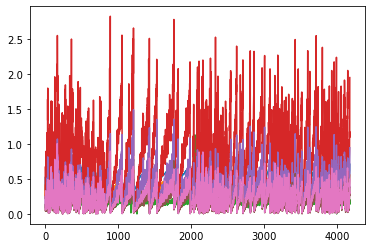

In [55]:
# Using the plotting function, representing the data

import matplotlib.pyplot as plt
the = x
the2 = np.linspace(1,x.shape[0],x.shape[0])
plt.plot(the2, the)
plt.show()
# All dimetions of data in a single graph

In [56]:
slice_length = 1000

x_train = x.T[:,:slice_length]
y_train = y[:slice_length].T
x_test = x.T[:,slice_length:slice_length*2]
y_test = y[slice_length:slice_length*2].T

# Converting the data into float, slicing necessary amount of it, then transposing it to carry out the calculations

In [58]:
from scipy import linalg as alg

coefficients = alg.inv(x_train @ x_train.T) @ x_train @ y_train.T # Magic function that gives coefficients of multivariate model of the real phenomena

print(coefficients)
print(x_test)
print(coefficients.shape)
print(x_test.shape)

y_prediction = coefficients @ x_test                              # Multiplying the coefficients with their variables

[ 12.39992721  10.82388959  23.32008932  13.88389159 -28.66267085
 -16.97249552  -0.36460461]
[[0.595  0.595  0.595  ... 0.35   0.35   0.355 ]
 [0.475  0.46   0.455  ... 0.235  0.25   0.27  ]
 [0.165  0.14   0.15   ... 0.08   0.07   0.105 ]
 ...
 [0.621  0.4655 0.518  ... 0.0725 0.0715 0.1425]
 [0.2435 0.2095 0.2205 ... 0.0465 0.0335 0.0525]
 [0.274  0.2515 0.27   ... 0.0495 0.046  0.0735]]
(7,)
(7, 1000)


In [60]:
error = np.abs(y_prediction - y_test).mean()/y_test.mean()*100              # Calculation of error % wise
print(error)

18.535042320003996


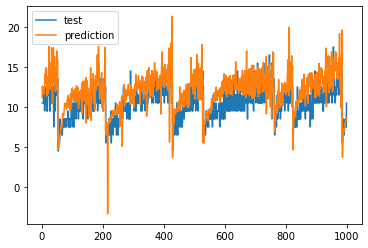

In [62]:
plt.plot(np.linspace(1,y_test.shape[0],y_test.shape[0]), y_test, label='test')
plt.plot(np.linspace(1,y_prediction.shape[0],y_prediction.shape[0]), y_prediction, label='prediction')
plt.legend()
plt.show()                                                        # Plotting the results

Error: 18.535042320003996%


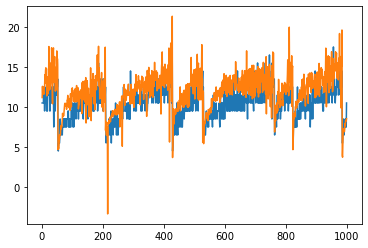

In [66]:
# Lastly, I am arranging the mathematical steps as a model into a python class.

class model:
    def __init__(self):
        pass
        
    def fit(self, x_train, y_train):
        self.coefficients = alg.inv(x_train @ x_train.T) @ x_train @ y_train.T
        return self.coefficients
        
    def predict(self, x_test):
        self.y_pred = self.coefficients @ x_test
        return self.y_pred
    
    def plot(self, y_test):
        plt.plot(np.linspace(1,y_test.shape[0],y_test.shape[0]), y_test)
        plt.plot(np.linspace(1,self.y_pred.shape[0],self.y_pred.shape[0]), self.y_pred)
        plt.show()                                                        # Plotting the results
    
    def error(self, y_test):
        self.error = np.abs(self.y_pred - y_test).mean()/y_test.mean()*100
        return self.error
        


m = model()
m.fit(x_train, y_train)
y_pred = m.predict(x_test)
print("Error: " + m.error(y_test).astype(str) + "%")
m.plot(y_test)